# Predicting Teenagers' Grades based on Family Background

#### This notebook uses a dataset of students' records which can be found at the following link:-

https://archive.ics.uci.edu/ml/datasets/Student+Performance


Finally the reasult would be a graph between the study-time of the students (teenagers) vs. *family-quality score* and the Grades of the students vs. *family-quality score.*

Also the model predicts an expected grade for the given *family-quality score*.


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

**The data is now ingested into a Pandas Dataframe.**

In [2]:
filename = "/home/aviral/Documents/Python4DS/Final Project/Student/student-mat.csv"
df_input = pd.read_csv(filename, sep = ';')
df_input.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
print(df_input.shape)

(395, 33)


Dropping redundant columns.

In [4]:
drop_col_list = ["school", "address", "famsize", "Mjob", "Fjob", "reason", "famsup", "traveltime", "higher", "schoolsup", "paid", "activities", "nursery", "freetime", "romantic", "goout", "Dalc", "Walc", "health"]
df_input = df_input.drop(drop_col_list, axis = 1)
df_input.head()

,sex,age,Pstatus,Medu,Fedu,guardian,studytime,failures,internet,famrel,absences,G1,G2,G3
0,F,18,A,4,4,mother,2,0,no,4,6,5,6,6
1,F,17,T,1,1,father,2,0,yes,5,4,5,5,6
2,F,15,T,1,1,mother,2,3,yes,4,10,7,8,10
3,F,15,T,4,2,mother,3,0,yes,3,2,15,14,15
4,F,16,T,3,3,father,2,0,no,4,4,6,10,10


In [5]:
print(df_input.shape)

(395, 14)


In [6]:
#Filtering out the non-teenagers entries - df_teen.
df_teen = df_input[df_input['age'] < 20]
df_teen.head()

,sex,age,Pstatus,Medu,Fedu,guardian,studytime,failures,internet,famrel,absences,G1,G2,G3
0,F,18,A,4,4,mother,2,0,no,4,6,5,6,6
1,F,17,T,1,1,father,2,0,yes,5,4,5,5,6
2,F,15,T,1,1,mother,2,3,yes,4,10,7,8,10
3,F,15,T,4,2,mother,3,0,yes,3,2,15,14,15
4,F,16,T,3,3,father,2,0,no,4,4,6,10,10


In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
pd_series = df_teen['Medu'] + df_teen['Fedu']
df_teen['Pedu'] = pd_series
df_teen = df_teen.drop(['Medu', 'Fedu'], axis = 1)
df_temp = df_teen.groupby(['Pedu'], as_index = False).agg({'G3': ['mean', 'count']})
df_teen.head()

,sex,age,Pstatus,guardian,studytime,failures,internet,famrel,absences,G1,G2,G3,Pedu
0,F,18,A,mother,2,0,no,4,6,5,6,6,8
1,F,17,T,father,2,0,yes,5,4,5,5,6,2
2,F,15,T,mother,2,3,yes,4,10,7,8,10,2
3,F,15,T,mother,3,0,yes,3,2,15,14,15,6
4,F,16,T,father,2,0,no,4,4,6,10,10,6


### Relation b/w Parents\' Education and the Grades of their wards.

The graph below clearly depicts the positive co-relation between the Education level of the 
Parents and the Grades of their wards.
More are the parents educated , the better their wards have a chance of scoring good grades.
This is also intuitive - Those who are themselves educated can fully understand the potential
of education.
However, these days even the parents who are themselves illiterate understand the importance 
of education.
However, another fact is that the educated parents are better equipped to support the future 
of their children.

A close look at the below graph shows that the data corresponding to the Parents' Education 
level - 1 is clearly an *outlier*.

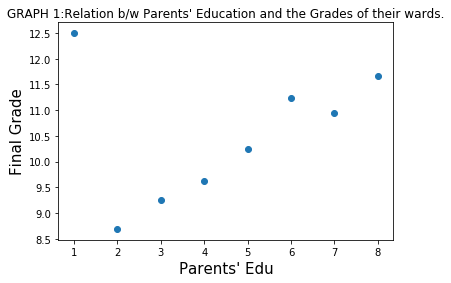

In [8]:
sc_plot = plt.scatter(df_temp['Pedu'], df_temp['G3']['mean'])
plt.xlabel('Parents\' Edu', fontsize = 15)
plt.ylabel('Final Grade', fontsize = 15)
plt.title('GRAPH 1:Relation b/w Parents\' Education and the Grades of their wards.')
sc_plot

In [9]:
df_temp

Pedu         G3      
             mean count
0    1  12.500000     2
1    2   8.684211    38
2    3   9.255814    43
3    4   9.628571    70
4    5  10.239130    46
5    6  11.238095    63
6    7  10.948276    58
7    8  11.657143    70

From the table above we can see that the number of entries for the 'Pedu' = 1 is very low and is equal to only 2. 
Hence, the data is not representative enough for us to judje the status for 'Pedu' = 1. 

This explains the outlier on the above graph (Graph 1).

Hence, dropping the records corresponding to 'Pedu' = 1 is a wise idea.

Following is the graph after dropping the required tuples.

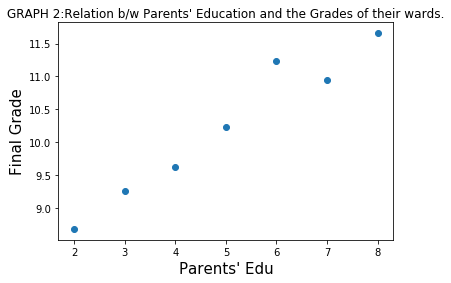

In [10]:
df_temp = df_temp.drop(df_temp.index[0])
sc_plot = plt.scatter(df_temp['Pedu'], df_temp['G3']['mean'])
plt.xlabel('Parents\' Edu', fontsize = 15)
plt.ylabel('Final Grade', fontsize = 15)
plt.title('GRAPH 2:Relation b/w Parents\' Education and the Grades of their wards.')
sc_plot

### Correlation between the Two axes:-

In [11]:
#corr_var1 contains the value of the correlation b/w students grades and their Parents' education.
corr_var1 = df_temp['Pedu'].corr(df_temp['G3']['mean'])
corr_var1

0.9752430642203631

In [12]:
#Dropping the tuples corresponding to 'Pedu' = 1
df_teen = df_teen.drop(df_teen[df_teen['Pedu'] == 1].index)

In [13]:
df_st_time = df_teen.groupby(['studytime'], as_index = False).agg({'G3': ['mean', 'count']})
df_st_time

studytime         G3      
                  mean count
0         1  10.019608   102
1         2  10.153846   195
2         3  11.343750    64
3         4  11.259259    27

From the computations on the above relation, we have computed the correlation below which is poisitve and is a value very close to 1. Hence these values are highly correlated.

In [14]:
corr_var2 = df_st_time['studytime'].corr(df_st_time['G3']['mean'])
corr_var2

0.8997575340238361

The following computation shows that there is not much variation in the mean for the different values of the 'Pstatus'. Hence, this field can be safely dropped.

In [15]:
df_temp2 = df_teen.groupby(['Pstatus'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp2

Pstatus         G3      
                mean count
0       A  11.076923    39
1       T  10.315186   349

In [16]:
df_teen = df_teen.drop(['Pstatus'], axis = 1)
df_teen.head()

,sex,age,guardian,studytime,failures,internet,famrel,absences,G1,G2,G3,Pedu
0,F,18,mother,2,0,no,4,6,5,6,6,8
1,F,17,father,2,0,yes,5,4,5,5,6,2
2,F,15,mother,2,3,yes,4,10,7,8,10,2
3,F,15,mother,3,0,yes,3,2,15,14,15,6
4,F,16,father,2,0,no,4,4,6,10,10,6


### Relation between Failures of the students and their Final Grades.

Following is the graph that displays the strong relation between Previous Failures of the students and their respective Final Grades.

Also following the graph is the numerical value of the correlation between these two mentioned fields. 

The value is a negative value (as evident from the graph below). Since the value is very close to -1, hence, we can infer that the previous Failures of the students greatly impacts their future performance.

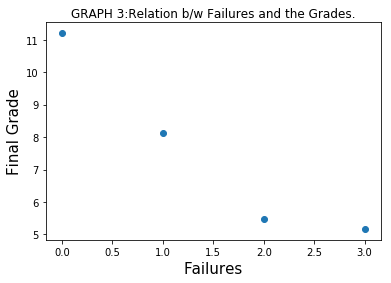

In [17]:
df_temp = df_teen.groupby(['failures'], as_index = False).agg({'G3': ['mean', 'count']})
sc_plot = plt.scatter(df_temp['failures'], df_temp['G3']['mean'])
plt.xlabel('Failures', fontsize = 15)
plt.ylabel('Final Grade', fontsize = 15)
plt.title('GRAPH 3:Relation b/w Failures and the Grades.')
sc_plot

In [18]:
corr_var3 = df_temp['failures'].corr(df_temp['G3']['mean'])
corr_var3

-0.9545581067429001

The following computation shows that there is not much variation in the mean for the different values of the 'internet'. Hence, this field can be safely dropped.

In [19]:
df_temp = df_teen.groupby(['internet'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp

internet         G3      
                 mean count
0       no   9.322581    62
1      yes  10.595092   326

In [20]:
df_teen = df_teen.drop(['internet'], axis = 1)
df_teen.head()

,sex,age,guardian,studytime,failures,famrel,absences,G1,G2,G3,Pedu
0,F,18,mother,2,0,4,6,5,6,6,8
1,F,17,father,2,0,5,4,5,5,6,2
2,F,15,mother,2,3,4,10,7,8,10,2
3,F,15,mother,3,0,3,2,15,14,15,6
4,F,16,father,2,0,4,4,6,10,10,6


### Next we'll analyse the effect of different guardians on the performance of the students in the final exam

In [21]:
df_temp = df_teen.groupby(['guardian'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp

guardian         G3      
                 mean count
0   father  10.688889    90
1   mother  10.472325   271
2    other   8.592593    27

It is clear from the above relation that whether the mother or the father is a guardian doesn't much affect the performance of the student. However, whether the guardian is a parent or not (other) highly affects the performance (negatively).

In [22]:
df_temp.loc[0, 'guardian'] = 0
df_temp.loc[1, 'guardian'] = 1
df_temp.loc[2, 'guardian'] = 2
df_temp

guardian         G3      
                 mean count
0        0  10.688889    90
1        1  10.472325   271
2        2   8.592593    27

In [23]:
corr_var4 = df_temp['guardian'].corr(df_temp['G3']['mean'])
corr_var4

-0.9091587616868864

Again we observe that there is high negative correlation between the Guradian type and the Final Grades of the student.

NOTE that it's a negative value.

### Next we'll analyse the role of family relations with the final grades of the student.

In [24]:
df_temp = df_teen.groupby(['famrel'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp

famrel         G3      
               mean count
0      1  10.625000     8
1      2   9.888889    18
2      3  10.059701    67
3      4  10.329897   194
4      5  10.801980   101

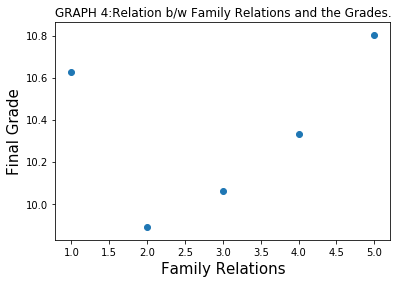

In [25]:
sc_plot = plt.scatter(df_temp['famrel'], df_temp['G3']['mean'])
plt.xlabel('Family Relations', fontsize = 15)
plt.ylabel('Final Grade', fontsize = 15)
plt.title('GRAPH 4:Relation b/w Family Relations and the Grades.')
sc_plot

A close study at the graph and the above table reveals that the point corresponding to 'famrel' = 1 is an outlier and that possibly be due to the very less number of corresponding tuples to compute the data upon.

Hence, it would be wise to drop the first entry.

After dropping the necessary records, we see that there is high correlation between the Final Grades of the students and the Family Relations. (Positive value very close to 1)

In [26]:
df_temp = df_temp.drop(index = 0)
corr_var5 = df_temp['famrel'].corr(df_temp['G3']['mean'])
corr_var5

0.9753114517836076

### Now let's have a look at the relation between Absenteism and the Final Grades of the students.

In [27]:
df_temp = df_teen.groupby(['absences'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp.head()

absences         G3      
                 mean count
0        0   8.359649   114
1        1  13.000000     3
2        2  11.888889    63
3        3  12.142857     7
4        4  11.211538    52

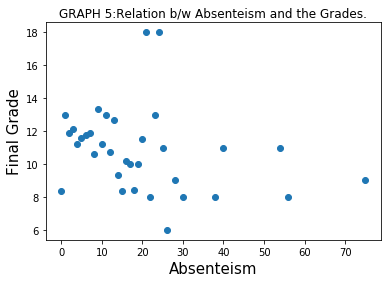

In [28]:
sc_plot = plt.scatter(df_temp['absences'], df_temp['G3']['mean'])
plt.xlabel('Absenteism', fontsize = 15)
plt.ylabel('Final Grade', fontsize = 15)
plt.title('GRAPH 5:Relation b/w Absenteism and the Grades.')
sc_plot

In [29]:
corr_var6 = df_temp['absences'].corr(df_temp['G3']['mean'])
corr_var6

-0.2698547085191

The above graph and the numerical correlation value shows that there is no concrete relation between Absenteism and the Final Grades of the students. Hence, we remove it.

In [30]:
df_teen = df_teen.drop('absences', axis = 1)
df_teen.head()

,sex,age,guardian,studytime,failures,famrel,G1,G2,G3,Pedu
0,F,18,mother,2,0,4,5,6,6,8
1,F,17,father,2,0,5,5,5,6,2
2,F,15,mother,2,3,4,7,8,10,2
3,F,15,mother,3,0,3,15,14,15,6
4,F,16,father,2,0,4,6,10,10,6


In [31]:
# df_teen['fam_qual'] = (
#                        corr_var1 * df_teen['Pedu'] +
#                        corr_var2 * df_teen['studytime'] + 
#                        corr_var3 * df_teen['failures'] + 
#                        corr_var4 * df_teen['guardian'] + 
#                        corr_var5 * df_teen['famrel'] + 
#                       )
# This operation is directly not possible becoz some of the entries are not numbers.
df_teen.head()

,sex,age,guardian,studytime,failures,famrel,G1,G2,G3,Pedu
0,F,18,mother,2,0,4,5,6,6,8
1,F,17,father,2,0,5,5,5,6,2
2,F,15,mother,2,3,4,7,8,10,2
3,F,15,mother,3,0,3,15,14,15,6
4,F,16,father,2,0,4,6,10,10,6


### Cleaning the data - converting all values to appropriate numerical values.

**Guardian** :-

Mother -> 1

Father -> 1

Other -> -1

In [32]:
df_guar = df_teen[df_teen['guardian'] == 'mother']
df_teen.loc[df_guar.index, 'guardian'] = 1
df_guar = df_teen[df_teen['guardian'] == 'father']
df_teen.loc[df_guar.index, 'guardian'] = 1
df_guar = df_teen[df_teen['guardian'] == 'other']
df_teen.loc[df_guar.index, 'guardian'] = -1
df_teen.head()

,sex,age,guardian,studytime,failures,famrel,G1,G2,G3,Pedu
0,F,18,1,2,0,4,5,6,6,8
1,F,17,1,2,0,5,5,5,6,2
2,F,15,1,2,3,4,7,8,10,2
3,F,15,1,3,0,3,15,14,15,6
4,F,16,1,2,0,4,6,10,10,6


In [33]:
df_teen['fam_qual'] = (
                       corr_var1 * df_teen['Pedu'] +
                       corr_var2 * df_teen['studytime'] + 
                       corr_var3 * df_teen['failures'] + 
                       df_teen['guardian'] + 
                       corr_var5 * df_teen['famrel'] 
                      )
df_teen = df_teen.round(1)
print("max : " + str(df_teen['fam_qual'].max()))
print("min : " + str(df_teen['fam_qual'].min()))

max : 16.4
min : 2.9


## Relation between Study time and the family-quality score is as follows:-

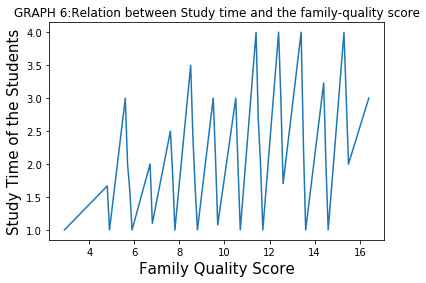

In [34]:
df_temp = df_teen.groupby(['fam_qual'], as_index = False).agg({'studytime': ['mean', 'count']})
df_temp
line_plot = plt.plot(df_temp['fam_qual'].values, df_temp['studytime']['mean'].values)
plt.xlabel('Family Quality Score', fontsize = 15)
plt.ylabel('Study Time of the Students', fontsize = 15)
plt.title('GRAPH 6:Relation between Study time and the family-quality score')
line_plot

In [35]:
corr_var7 = df_temp['fam_qual'].corr(df_temp['studytime']['mean'])
corr_var7

0.3987983099559746

A look at the above graph (Graph 6) and the numerical correlation values indicate that the studytime incresses with the *Family-Quality score*. There is concentration of the higher studytime values with the higher 'fam_qual' values. However, there is no clear indication that the better the quality of the family, greater would be the studytime of the students.

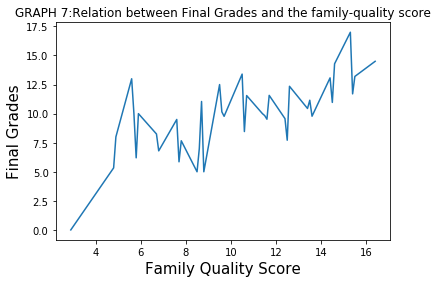

In [36]:
df_temp = df_teen.groupby(['fam_qual'], as_index = False).agg({'G3': ['mean', 'count']})
df_temp
sc_plot = plt.plot(df_temp['fam_qual'].values, df_temp['G3']['mean'].values)
plt.xlabel('Family Quality Score', fontsize = 15)
plt.ylabel('Final Grades', fontsize = 15)
plt.title('GRAPH 7:Relation between Final Grades and the family-quality score')
sc_plot

In [37]:
corr_var8 = df_temp['fam_qual'].corr(df_temp['G3']['mean'])
corr_var8

0.6831187436972231

A close observation at the above graph (Graph 7) shows that there is a steady growing trend in the Final Grades of the students as the *Family-Quality score* increases. An important point is to note is that the increase in the grades with the higher family quality is sufficiently high to classify it as a **strong** relationship.

However, looking at the numerical value of the correlation (as suggested by the graph), it's evident that higher the value of the *family-quality score*, higher would be the Final Grades of the students.

# Family-Quality Score

The *family-quality score* consists of the following fields :-

1. Pedu
2. studytime
3. failures
4. guardian
5. famrel

The above study gives the following conclusion :-

1. The relation between 'studytime' and the *family-quality score* is non-conclusive as the correlation (numerical) between them indicates no strong relationship between the two.
2. The relation between Final Grades of the students and the respective *family-quality score* is indicated by the high numerical correlation value and the GRAPH 7 also suggests strong relationship between the two. Hence, the final grades of the students can be predicted by knowing their *family-quality scores*.

Thus, we come up with a model that uses the concepts of ..... to predict the Final grades of the students given their *family-quality scores*.